# Transfer Learning Assignment

Download all the data in rar_file in our folder</a> , it contains all the data required.
 When you unrar the file you'll get the files in the following format: <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:
<pre>
    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
</pre>

There is a file named as 'labels_final.csv' , it consists of two columns. First column is path which is the required path to the images and second is the class label.

In [1]:
#the dataset that you are dealing with is quite large 3.7 GB and hence there are two methods to import the data to Colab 
# Method 1- you can use gdown module to get the data directly from Google drive to Colab
# the syntax is as follows !gdown --id file_id , for ex - running the below cell will import the rvl-cdip.rar dataset


In [2]:
import tensorflow as tf

In [3]:
import os
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#cd /content/drive/MyDrive/DataScience/TF

In [6]:
#!gdown --id 1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu

In [7]:
# Method -2 you can also import the data using wget function
#https://www.youtube.com/watch?v=BPUfVq7RaY8


In [8]:
#unrar the file
#get_ipython().system_raw("unrar x rvl-cdip.rar")

## 2. On this image data, you have to train 3 types of models as given below You have to split the data into Train and Validation data.

In [9]:
!pwd

/kaggle/working


In [10]:
#cd /content/drive/MyDrive/DataScience/TF

In [11]:
cd ../input/datatf

/kaggle/input/datatf


In [12]:
#import all the required libraries
import tensorflow as tf
import os
import numpy as np
import pandas as pd

df=pd.read_csv('labels_final.csv',dtype=str)

In [13]:
df.head()

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7


In [14]:
#cd /content/drive/MyDrive/DataScience/TF/data_final

In [15]:
cd ./data_final

/kaggle/input/datatf/data_final




3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>

Note- In the reference notebook you were dealing with jpg images, in the given dataset you are dealing with tiff images. Imagedatagenrator works with both type of images. If you want to use custom data pipeline then you have to convert your tiff images to jpg images.

4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below. 

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)


6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>

https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3426/code-example-cats-vs-dogs/8/module-8-neural-networks-computer-vision-and-deep-learning </a>
</pre>

7. Do print model.summary() and draw model_plots for each of the model.

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

In [16]:
#https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

In [17]:
img_width, img_height = 224, 224
top_model_weights_path = 'bottleneck_fc_model.h5'
epochs = 50
batch_size = 64
STEP_SIZE_TRAIN = 0
STEP_SIZE_VALID = 0

In [18]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

train_generator=datagen.flow_from_dataframe(dataframe=df,x_col="path",y_col="label",subset="training",batch_size=32,
                                            seed=42,shuffle=True,class_mode="categorical",target_size=(224,224))

valid_generator=datagen.flow_from_dataframe(dataframe=df,x_col="path",y_col="label",subset="validation",batch_size=32,
                                            seed=42,shuffle=True,class_mode="categorical",target_size=(224,224))

Found 36000 validated image filenames belonging to 16 classes.
Found 12000 validated image filenames belonging to 16 classes.


In [19]:
nb_train_samples = len(train_generator.filenames)  
num_classes = len(train_generator.class_indices)  
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
nb_train_samples,num_classes,STEP_SIZE_TRAIN,STEP_SIZE_VALID

(36000, 16, 1125, 375)

In [20]:
import tensorflow.keras.backend as K
class RateHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        lr = float(K.get_value(self.model.optimizer.lr))
        print('\nEpoch %05d: Learning rate to %s.' % (epoch + 1, lr))  
        
rate_own=RateHistory()  

In [21]:
import os
import datetime

In [22]:
#lrschedule = tf.keras.callbacks.LearningRateScheduler(changeLearningRate)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) #SGD(learning_rate=0.1, decay=1e-4, momentum=0.9 ,nesterov=True ) 

#earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3, verbose=1)

filepath= "/kaggle/working/best_model_1.h5" #"model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

log_dir = os.path.join("/kaggle/working/logs1",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

2022-02-23 07:29:15.657001: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-23 07:29:15.657043: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-02-23 07:29:15.710872: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-02-23 07:29:15.742635: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-23 07:29:15.742794: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [23]:
#https://keras.io/guides/transfer_learning/

base_model = tf.keras.applications.VGG16(include_top=False,input_shape=(224, 224, 3), weights='imagenet')

base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))

#Base Model

x = base_model(inputs, training=False)

#Conv Layer
x = Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='ConvL')(x)
#MaxPool Layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

#FC layer
FC1 = Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(x)

#FC layer
FC2 = Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='FC2')(FC1)

#output layer

outputs = Dense(num_classes,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(FC2)


model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])


2022-02-23 07:29:15.980381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 07:29:16.084003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 07:29:16.084795: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 07:29:16.086405: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
ConvL (Conv2D)               (None, 3, 3, 128)         589952    
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
FC1 (Dense)                  (None, 64)                8256      
_________________________________________________________________
FC2 (Dense)                  (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 16)                528   

In [25]:
model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,
          validation_steps=STEP_SIZE_VALID,
          epochs=15,callbacks=[rate_own,checkpoint,tensorboard_callback])

2022-02-23 07:29:20.027153: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15

Epoch 00001: Learning rate to 0.009999999776482582.


2022-02-23 07:29:22.031000: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


   1/1125 [..............................] - ETA: 3:12:54 - loss: 2.7892 - accuracy: 0.1562

2022-02-23 07:29:30.397186: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-23 07:29:30.397227: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   2/1125 [..............................] - ETA: 7:54 - loss: 3.7571 - accuracy: 0.1094   

2022-02-23 07:29:30.799696: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-02-23 07:29:30.800376: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-02-23 07:29:30.945485: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 170 callback api events and 167 activity events. 
2022-02-23 07:29:30.952917: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-23 07:29:30.974764: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs1/fits/20220223-072915/train/plugins/profile/2022_02_23_07_29_30

2022-02-23 07:29:30.986255: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs1/fits/20220223-072915/train/plugins/profile/2022_02_23_07_29_30/2e6f757348da.trace.json.gz


   3/1125 [..............................] - ETA: 7:23 - loss: 4.4687 - accuracy: 0.0938

2022-02-23 07:29:31.033333: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs1/fits/20220223-072915/train/plugins/profile/2022_02_23_07_29_30

2022-02-23 07:29:31.042871: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to /kaggle/working/logs1/fits/20220223-072915/train/plugins/profile/2022_02_23_07_29_30/2e6f757348da.memory_profile.json.gz
2022-02-23 07:29:31.043813: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: /kaggle/working/logs1/fits/20220223-072915/train/plugins/profile/2022_02_23_07_29_30
Dumped tool data for xplane.pb to /kaggle/working/logs1/fits/20220223-072915/train/plugins/profile/2022_02_23_07_29_30/2e6f757348da.xplane.pb
Dumped tool data for overview_page.pb to /kaggle/working/logs1/fits/20220223-072915/train/plugins/profile/2022_02_23_07_29_30/2e6f757348da.overview_page.pb
Dumped tool data for input_pipeline.pb to /kaggle/w

1125/1125 [==============================] - 459s 400ms/step - loss: 1.8066 - accuracy: 0.4161 - val_loss: 1.4197 - val_accuracy: 0.5506

Epoch 00001: val_accuracy improved from -inf to 0.55058, saving model to /kaggle/working/best_model_1.h5
Epoch 2/15

Epoch 00002: Learning rate to 0.009999999776482582.
1125/1125 [==============================] - 237s 210ms/step - loss: 1.3991 - accuracy: 0.5556 - val_loss: 1.3242 - val_accuracy: 0.5912

Epoch 00002: val_accuracy improved from 0.55058 to 0.59117, saving model to /kaggle/working/best_model_1.h5
Epoch 3/15

Epoch 00003: Learning rate to 0.009999999776482582.
1125/1125 [==============================] - 233s 207ms/step - loss: 1.2749 - accuracy: 0.5991 - val_loss: 1.2562 - val_accuracy: 0.6102

Epoch 00003: val_accuracy improved from 0.59117 to 0.61017, saving model to /kaggle/working/best_model_1.h5
Epoch 4/15

Epoch 00004: Learning rate to 0.009999999776482582.
1125/1125 [==============================] - 233s 208ms/step - loss: 1.20

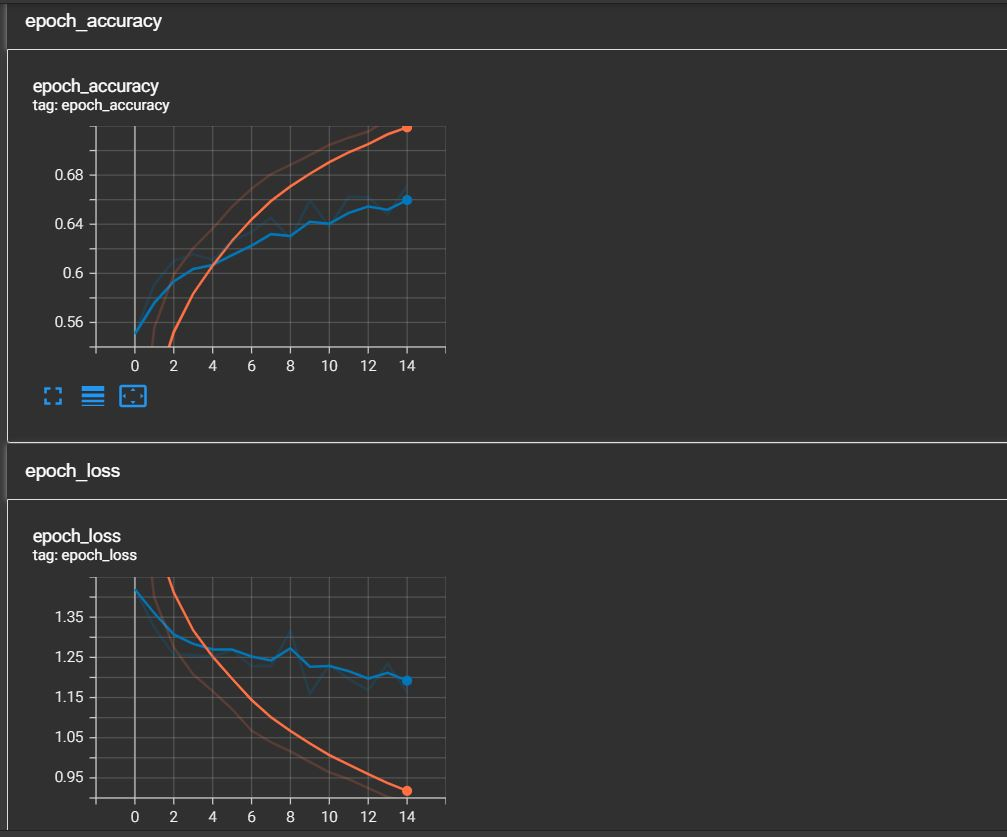

In [7]:
from IPython.display import Image 
Image('TF_model1.jpg',width=700,height=700) 

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer.Any FC 
layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. 
For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. 
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will
simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the 
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer</b>
4. 4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

In [26]:
#lrschedule = tf.keras.callbacks.LearningRateScheduler(changeLearningRate)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) #SGD(learning_rate=0.1, decay=1e-4, momentum=0.9 ,nesterov=True ) 

#earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3, verbose=1)

filepath= "/kaggle/working/best_model_2.h5" #"model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

log_dir = os.path.join("/kaggle/working/logs2",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

2022-02-23 08:38:09.444869: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-23 08:38:09.444934: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-02-23 08:38:09.613547: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-23 08:38:09.613745: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [27]:
#https://keras.io/guides/transfer_learning/

base_model = tf.keras.applications.VGG16(include_top=False,input_shape=(224, 224, 3), weights='imagenet')

base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))

#Base Model

x = base_model(inputs, training=False)


#Conv Layer
x = Conv2D(filters=256,kernel_size=(7,7),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv1')(x)

#Conv Layer
x = Conv2D(filters=128,kernel_size=(1,1),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv2')(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = Dense(num_classes,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
Conv1 (Conv2D)               (None, 1, 1, 256)         6422784   
_________________________________________________________________
Conv2 (Conv2D)               (None, 1, 1, 128)         32896     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
Output (Dense)               (None, 16)                2064      
Total params: 21,172,432
Trainable params: 6,457,744
Non-trainable params: 14,714,688
_______________________________________

In [29]:
model_2.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,
          validation_steps=STEP_SIZE_VALID,
          epochs=15,callbacks=[rate_own,checkpoint,tensorboard_callback])

Epoch 1/15

Epoch 00001: Learning rate to 0.009999999776482582.
   1/1125 [..............................] - ETA: 16:44 - loss: 3.0153 - accuracy: 0.0938

2022-02-23 08:38:44.221737: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-23 08:38:44.221787: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   2/1125 [..............................] - ETA: 5:10 - loss: 38.1039 - accuracy: 0.0469

2022-02-23 08:38:44.525042: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-02-23 08:38:44.525444: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-02-23 08:38:44.661942: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 166 callback api events and 163 activity events. 
2022-02-23 08:38:44.669126: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-23 08:38:44.674632: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs2/fits/20220223-083809/train/plugins/profile/2022_02_23_08_38_44

2022-02-23 08:38:44.678150: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs2/fits/20220223-083809/train/plugins/profile/2022_02_23_08_38_44/2e6f757348da.trace.json.gz
2022-02-23 08:38:44.686536: I tensorflow/core/

1125/1125 [==============================] - 270s 240ms/step - loss: 2.2065 - accuracy: 0.4776 - val_loss: 1.4866 - val_accuracy: 0.5212

Epoch 00001: val_accuracy improved from -inf to 0.52117, saving model to /kaggle/working/best_model_2.h5
Epoch 2/15

Epoch 00002: Learning rate to 0.009999999776482582.
1125/1125 [==============================] - 246s 218ms/step - loss: 1.3216 - accuracy: 0.5835 - val_loss: 1.3358 - val_accuracy: 0.5861

Epoch 00002: val_accuracy improved from 0.52117 to 0.58608, saving model to /kaggle/working/best_model_2.h5
Epoch 3/15

Epoch 00003: Learning rate to 0.009999999776482582.
1125/1125 [==============================] - 244s 217ms/step - loss: 1.2283 - accuracy: 0.6146 - val_loss: 1.2920 - val_accuracy: 0.6037

Epoch 00003: val_accuracy improved from 0.58608 to 0.60367, saving model to /kaggle/working/best_model_2.h5
Epoch 4/15

Epoch 00004: Learning rate to 0.009999999776482582.
1125/1125 [==============================] - 241s 214ms/step - loss: 1.18

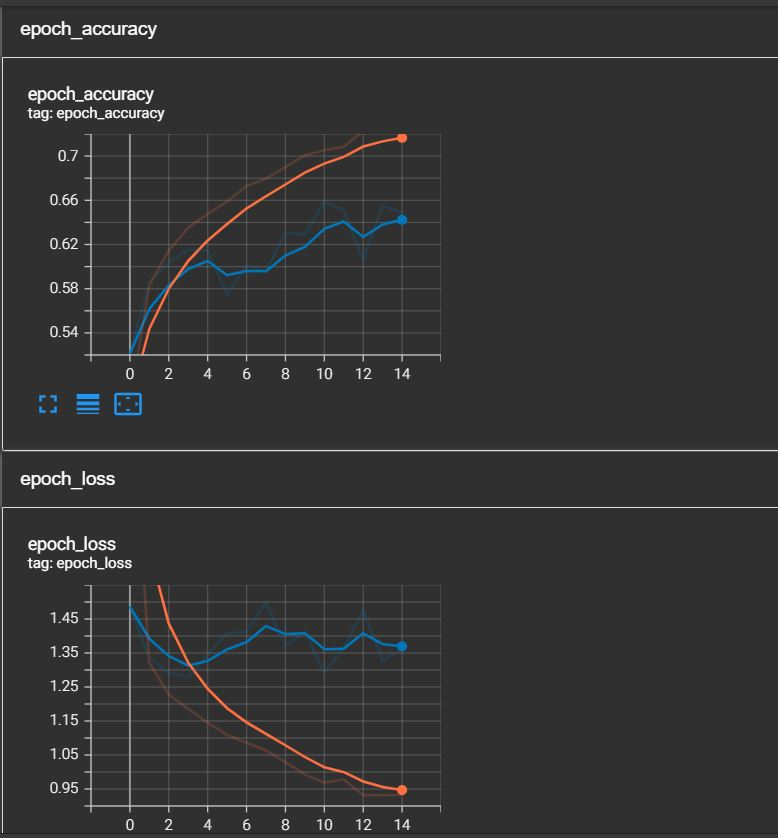

In [9]:
from IPython.display import Image 
Image('TF_model2.jpg',width=700,height=700) 

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [30]:
#lrschedule = tf.keras.callbacks.LearningRateScheduler(changeLearningRate)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) #SGD(learning_rate=0.1, decay=1e-4, momentum=0.9 ,nesterov=True ) 

#earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3, verbose=1)

filepath= "/kaggle/working/best_model_3.h5" #"model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

log_dir = os.path.join("/kaggle/working/logs3",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

2022-02-23 09:44:34.325721: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-23 09:44:34.325815: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-02-23 09:44:34.499333: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-23 09:44:34.499511: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [31]:
#https://keras.io/guides/transfer_learning/

base_model = tf.keras.applications.VGG16(include_top=False,input_shape=(224, 224, 3), weights='imagenet')

for layer in base_model.layers[:-6]:
    layer.trainable = False
    

inputs = tf.keras.Input(shape=(224, 224, 3))

#Base Model

x = base_model(inputs, training=False)


#Conv Layer
x = Conv2D(filters=256,kernel_size=(7,7),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv1')(x)

#Conv Layer
x = Conv2D(filters=128,kernel_size=(1,1),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv2')(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = Dense(num_classes,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(x)

model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
Conv1 (Conv2D)               (None, 1, 1, 256)         6422784   
_________________________________________________________________
Conv2 (Conv2D)               (None, 1, 1, 128)         32896     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 128)               0         
_________________________________________________________________
Output (Dense)               (None, 16)                2064      
Total params: 21,172,432
Trainable params: 15,896,976
Non-trainable params: 5,275,456
_______________________________________

In [33]:
model_3.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,
          validation_steps=STEP_SIZE_VALID,
          epochs=15,callbacks=[rate_own,checkpoint,tensorboard_callback])

Epoch 1/15

Epoch 00001: Learning rate to 0.009999999776482582.
   1/1125 [..............................] - ETA: 19:49 - loss: 2.9243 - accuracy: 0.1562

2022-02-23 09:45:42.615946: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-23 09:45:42.616000: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   2/1125 [..............................] - ETA: 5:37 - loss: 41591.7344 - accuracy: 0.0938

2022-02-23 09:45:42.954351: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-02-23 09:45:42.955556: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-02-23 09:45:43.092929: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 232 callback api events and 229 activity events. 
2022-02-23 09:45:43.099697: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-23 09:45:43.108114: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs3/fits/20220223-094434/train/plugins/profile/2022_02_23_09_45_43

2022-02-23 09:45:43.112351: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs3/fits/20220223-094434/train/plugins/profile/2022_02_23_09_45_43/2e6f757348da.trace.json.gz
2022-02-23 09:45:43.125013: I tensorflow/core/

1125/1125 [==============================] - 242s 214ms/step - loss: 101.6445 - accuracy: 0.0618 - val_loss: 2.7743 - val_accuracy: 0.0593

Epoch 00001: val_accuracy improved from -inf to 0.05933, saving model to /kaggle/working/best_model_3.h5
Epoch 2/15

Epoch 00002: Learning rate to 0.009999999776482582.
1125/1125 [==============================] - 242s 215ms/step - loss: 2.7745 - accuracy: 0.0615 - val_loss: 2.7745 - val_accuracy: 0.0616

Epoch 00002: val_accuracy improved from 0.05933 to 0.06158, saving model to /kaggle/working/best_model_3.h5
Epoch 3/15

Epoch 00003: Learning rate to 0.009999999776482582.
1125/1125 [==============================] - 237s 211ms/step - loss: 2.7744 - accuracy: 0.0639 - val_loss: 2.7743 - val_accuracy: 0.0635

Epoch 00003: val_accuracy improved from 0.06158 to 0.06350, saving model to /kaggle/working/best_model_3.h5
Epoch 4/15

Epoch 00004: Learning rate to 0.009999999776482582.
1125/1125 [==============================] - 244s 217ms/step - loss: 2.

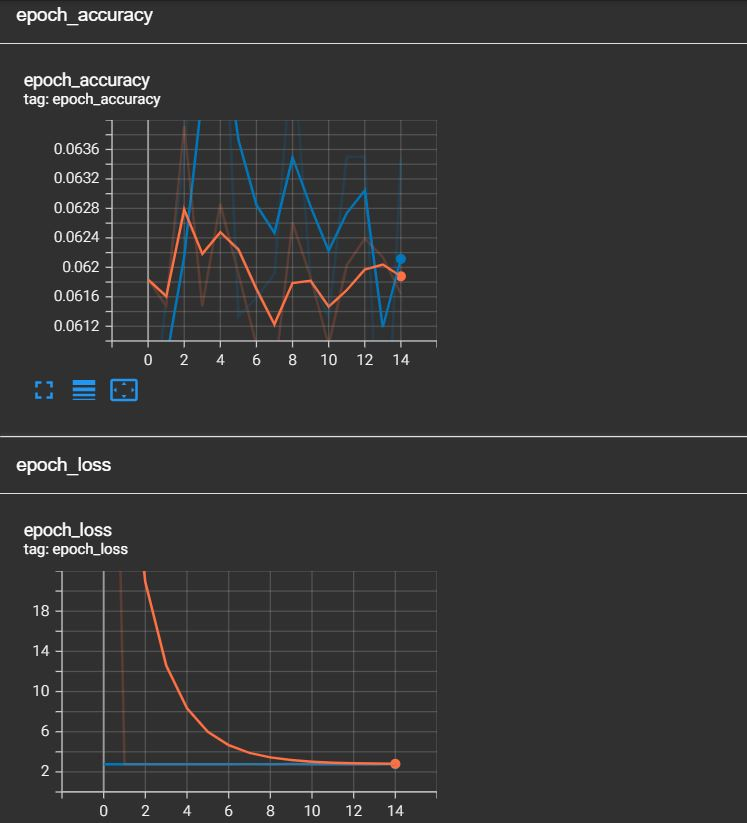

In [10]:
from IPython.display import Image 
Image('TF_model3.jpg',width=700,height=700) 

### Please write your observations or a brief summary of the results that you get after performing transfer learning with reference to model1, model2 and model3

In [9]:
#https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/
table_values = [["Model 1","67.14"],
                ["Model 2","65.88"],
                ["Model 3","6.69"]
                ]

table_summary = pd.DataFrame(table_values,columns=[ "Model", "Val Accuracy"])
table_summary.style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'White',                       
                                    'border-color': 'white'})


,Model,Val Accuracy
0,Model 1,67.14
1,Model 2,65.88
2,Model 3,6.69
